<a href="https://colab.research.google.com/github/vshalisko/PythonIntro/blob/main/Unidad_3/Proyecto_4_borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd

# Ruta al archivo en su Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab Data/data_af.csv'

# Leer un archivo con datos separados por espacio
df = pd.read_csv(ruta_archivo)

# presentar el contenido de primeras líneas de DataFrame
display(df)

,rating,salary,draft_round,age,experience,bmi
0,97,37440000,1,36,17,26.72
1,97,32740000,1,29,9,25.27
2,96,25840000,1,26,7,24.66
3,96,37200000,1,32,13,24.11
4,96,38200000,1,31,11,25.98
...,...,...,...,...,...,...
434,95,40920000,1,33,14,24.11
435,95,35360000,1,28,9,23.28
436,94,10170000,1,22,3,25.49
437,94,39340000,1,31,9,25.04


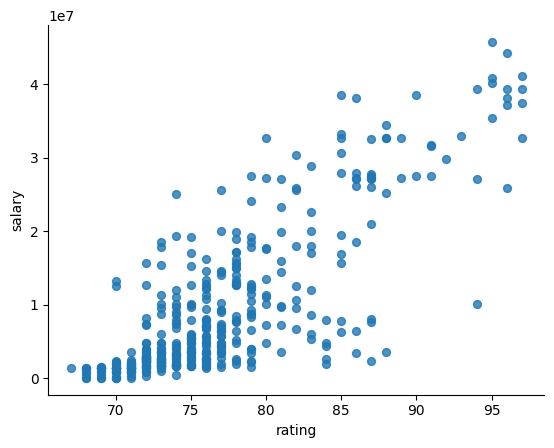

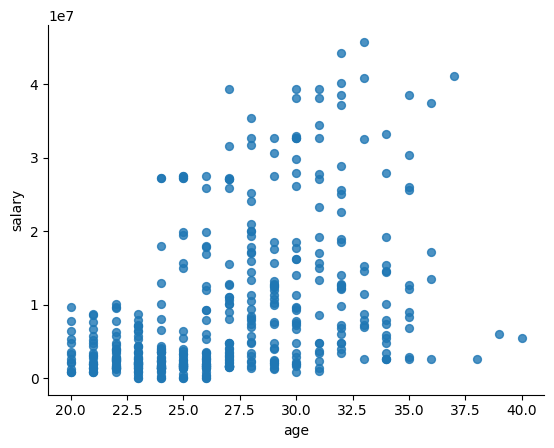

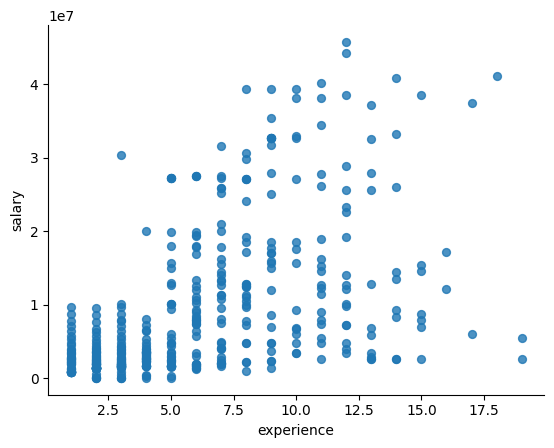

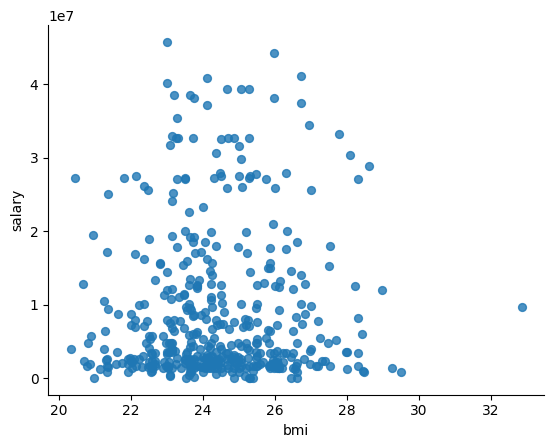

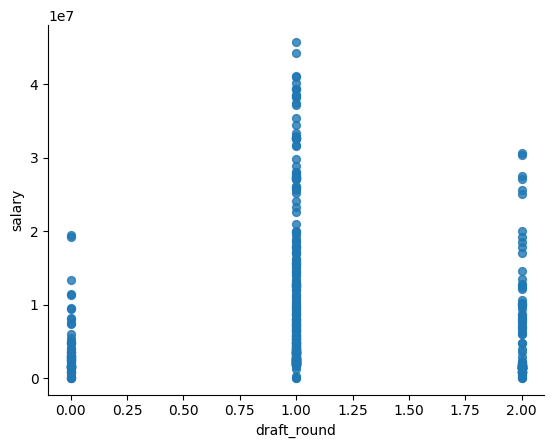

In [9]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rating', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='age', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='experience', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='bmi', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='draft_round', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
from sklearn.model_selection import train_test_split

## data splitting and variable definition
X, y = df.iloc[:, :1], df["salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(307, 1) (132, 1) (307,) (132,)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape

## ajuste del modelo
model = LinearRegression()
model.fit(X_train, y_train)

## evaluación del modelo
y_test_pred = model.predict(X_test)
result_r2 = r2_score(y_test, y_test_pred)
result_mape = mape(y_test, y_test_pred)

## resultados
print("Intercept: {}, coeficiente X: {}, r2: {}, MAPE: {}".format(
                        round(model.intercept_, 5),
                        round(model.coef_[0], 5),
                        round(result_r2, 5),
                        round(result_mape, 5)))

Intercept: -92389014.05703, coeficiente X: 1322855.14922, r2: 0.67379, MAPE: 1.20875


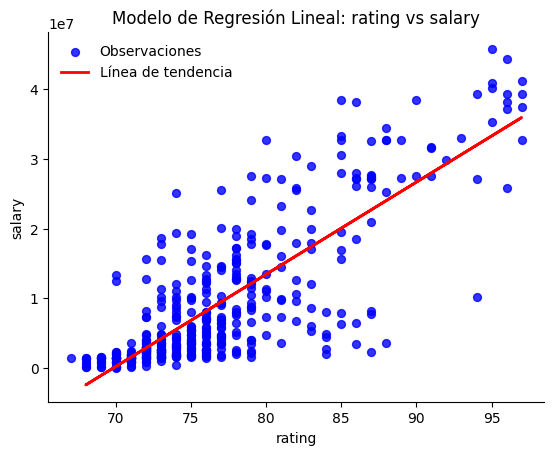

In [50]:
# Presentar grafica de puntos
plt.scatter(X, y, color='blue', label='Observaciones', s=32, alpha=.8)

# Agregar la linea de regresión
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Línea de tendencia')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('salary');
plt.xlabel(r'rating');
plt.title('Modelo de Regresión Lineal: rating vs salary')
plt.legend(frameon=False, loc=2)
plt.show()

